## Importy

In [103]:
import pandas as pd
import requests
import io
from load_data import load_data
import seaborn as sns
import matplotlib.pyplot as plt

## Pobranie potrzebnych danych

In [104]:
def get_metadata() -> pd.DataFrame | None:
    """
    Pobiera aktualne metadane stacji pomiarowych z portalu GIOS

    Returns:
        pd.DataFrame: DataFrame z informacjami o stacjach
    """
    metadata_url = 'https://powietrze.gios.gov.pl/pjp/archives/downloadFile/622'

    try:
        response = requests.get(metadata_url)
        response.raise_for_status()

        df_metadata = pd.read_excel(io.BytesIO(response.content), header=0)
        return df_metadata

    except requests.exceptions.RequestException as e:
        print(f"Błąd połączenia podczas pobierania metadanych: {e}")
        return None
    except Exception as e:
        print(f"Wystąpił nieoczekiwany błąd podczas wczytywania metadanych: {e}")
        return None

In [105]:
df = load_data()

In [106]:
df_metadata = get_metadata()

## Podgląd danych

In [107]:
df.head()

,Kod stacji,"(Jelenia Góra, DsJelGorOgin)","(Wrocław, DsWrocAlWisn)","(Wrocław, DsWrocWybCon)","(Bydgoszcz, KpBydPlPozna)","(Bydgoszcz, KpBydWarszaw)","(Lublin, LbLubObywate)","(Łódź, LdLodzCzerni)","(Zgierz, LdZgieMielcz)","(Zielona Góra, LuZielKrotka)",...,"(Przemyśl, PkPrzemGrunw)","(Gdańsk, PmGdaLeczkow)","(Kościerzyna, PmKosTargowa)","(Katowice, SlKatoKossut)","(Złoty Potok, SlZlotPotLes)","(Olsztyn, WmOlsPuszkin)","(Kalisz, WpKaliSawick)","(Szczecin, ZpSzczAndrze)","(Szczecin, ZpSzczPilsud)",Rok
0,2015-01-01 01:00:00,151.112,78.0,50.0,29.2,95.5,71.1012,59.73,58.690689,NaN,...,18.9027,NaN,NaN,51.389,49.9464,44.060833,25.5,NaN,NaN,2015
1,2015-01-01 02:00:00,262.566,42.0,33.8244,27.1,86.1,95.2582,185.92,44.501255,51.8628,...,15.9257,75.5278,NaN,37.709,45.6291,49.943329,32.5,81.8501,215.379,2015
2,2015-01-01 03:00:00,222.83,27.0,28.7215,7.9,23.8,49.5078,54.25,24.163937,15.866,...,16.1709,8.87389,NaN,41.984,49.2093,20.688448,24.3,25.7333,27.7458,2015
3,2015-01-01 04:00:00,210.767,24.0,20.6891,7.1,15.9,60.8468,50.15,19.516039,20.1187,...,16.0252,8.83194,22.7895,45.404,53.316,17.437717,24.4,18.624,26.5201,2015
4,2015-01-01 05:00:00,191.211,22.0,22.5335,9.2,15.0,49.3106,39.17,16.850332,27.3413,...,15.5498,6.5675,NaN,36.854,51.5259,15.532262,25.0,17.6545,31.0393,2015


In [108]:
df_metadata.head()

,Nr,Kod stacji,Kod międzynarodowy,Nazwa stacji,Stary Kod stacji \n(o ile inny od aktualnego),Data uruchomienia,Data zamknięcia,Typ stacji,Typ obszaru,Rodzaj stacji,Województwo,Miejscowość,Adres,WGS84 φ N,WGS84 λ E
0,1,DsBialka,NaN,Białka,NaN,1990-01-03,2005-12-31,przemysłowa,podmiejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Białka,NaN,51.197783,16.117390
1,2,DsBielGrot,NaN,Bielawa - ul. Grota Roweckiego,NaN,1994-01-02,2003-12-31,tło,miejski,w budynku,DOLNOŚLĄSKIE,Bielawa,ul. Grota Roweckiego 6,50.682510,16.617348
2,3,DsBogatFrancMOB,PL0602A,Bogatynia Mobil,DsBogatMob,2015-01-01,2015-12-31,tło,miejski,mobilna,DOLNOŚLĄSKIE,Bogatynia,ul. Francuska/Kręta,50.940998,14.916790
3,4,DsBogChop,PL0315A,Bogatynia - Chopina,NaN,1996-01-01,2013-12-31,przemysłowa,miejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Bogatynia,ul. Chopina 35,50.905856,14.967175
4,5,DsBogZatonieMob,PL0576A,Bogatynia - Mobil,NaN,2012-01-01,2012-12-31,przemysłowa,miejski,mobilna,DOLNOŚLĄSKIE,Bogatynia,"ul. Konrada, Zatonie",50.943245,14.913327


## Prawidłowy kod dla zad5

In [109]:
def oblicz_przekroczenia_wojewodztwa(df_wejsciowe: pd.DataFrame, df_metadane: pd.DataFrame) -> pd.DataFrame:
    """
    Oblicza liczbę dni z przekroczeniem normy PM2.5 w każdym województwie z lat 2015, 2018, 2021, 2024

    Args:
        df_wejsciowe (pd.DataFrame): Zmergowane dane wejściowe z lat 2015, 2018, 2021, 2024, odnośnie zanieczyszczeń pyłami PM2.5
        df_metadane (pd.DataFrame): Metadane z informacjami m.in. o województwach
    Returns:
        pd.DataFrame: Dane w formacie długim gotowe do wizualizacji
    """
    df = df_wejsciowe.copy()

    # Wyciągamy datę z kolumny 'Kod stacji'
    df.index = pd.to_datetime(df.pop('Kod stacji'))
    df.index.name = 'Data'

    # Usuwamy kolumny 'Rok' (nie jest stacją pomiarową)
    if 'Rok' in df.columns:
        df = df.drop(columns=['Rok'])

    # Rozbijamy krotki w kolumnach i wyciągnięcie samych kodów stacji (drugi el krotki)
    df.columns = [c[1] if isinstance(c, tuple) else c for c in df.columns]

    # Czyścimy kody stacji ze spacji (w danych i metadanych)
    df.columns = df.columns.astype(str).str.strip()

    df_meta_clean = df_metadane.copy()
    df_meta_clean['Kod stacji'] = df_meta_clean['Kod stacji'].astype(str).str.strip()

    # Przygotowujemy mapy: Kod stacji -> Województwo
    mapa_woj = dict(zip(df_meta_clean['Kod stacji'], df_meta_clean['Województwo']))

    pasujace_stacje = [c for c in df.columns if c in mapa_woj]
    df_filtrowane = df[pasujace_stacje]

    # Przygotowanie średniej dziennej i filtr przekroczenia normy
    df_dzienne = df_filtrowane.resample('D').mean()

    oznacz_przekroczenie = df_dzienne > 15

    # Grupujemy przekorczenia w stacjach w województwa (any, więc jeśli chociaż jedno przekroczy -> oznacza jako True)
    przekroczenia_w_woj = oznacz_przekroczenie.T.groupby(mapa_woj).any().T

    # Grupujemy po roku wyciągniętym z daty i zliczanie wystąpień True
    wynik = przekroczenia_w_woj.astype(int).groupby(pd.to_datetime(przekroczenia_w_woj.index).year).sum()
    # Funkcja z danymi wyselekcjonowała dane dla lat 2015, 2018, 2021, 2024, więc usuwamy lata, dla których nie ma danych
    wynik = wynik[(wynik.T != 0).any()]

    wynik.index.name = 'Rok'
    return wynik

In [110]:
oblicz_przekroczenia_wojewodztwa(df, df_metadata)

,DOLNOŚLĄSKIE,KUJAWSKO-POMORSKIE,LUBELSKIE,LUBUSKIE,MAZOWIECKIE,MAŁOPOLSKIE,OPOLSKIE,PODKARPACKIE,PODLASKIE,POMORSKIE,WARMIŃSKO-MAZURSKIE,WIELKOPOLSKIE,ZACHODNIOPOMORSKIE,ŁÓDZKIE,ŚLĄSKIE
Rok,,,,,,,,,,,,,,,
2015,310,200,276,225,313,346,265,238,158,198,180,268,176,221,272
2018,250,251,234,144,286,346,281,225,135,201,190,197,201,263,286
2021,221,145,246,92,257,262,178,180,137,180,130,209,142,220,221
2024,158,131,170,145,195,187,111,146,76,153,139,163,130,195,166


In [111]:
def stworz_wykres_slupkowy_static(df_wynikowy: pd.DataFrame) -> None:
    """
    Oblicza liczbę dni z przekroczeniem normy PM2.5 w każdym województwie z lat 2015, 2018, 2021, 2024

    Args:
        df_wynikowy (pd.DataFrame): Wynik obróbki danych wejściowych o przekroczeniu średniej dziennej w województwach
    Returns:
        None: Funkcja nie zwraca wartości, wyświetla jedynie gotowy wykres
    """
    # Przekształcamy dane
    df_plot = df_wynikowy.reset_index().melt(id_vars='Rok', var_name='Województwo', value_name='Dni')

    plt.figure(figsize=(16, 8))
    sns.set_style("whitegrid")

    sns.barplot(data=df_plot, x='Województwo', y='Dni', hue='Rok', palette='deep')

    plt.title('Liczba dni z przekroczeniem normy dobowej PM2.5 według województw', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Liczba dni w roku')
    plt.xlabel('Województwo')
    plt.legend(title='Rok')

    plt.tight_layout()
    plt.show()

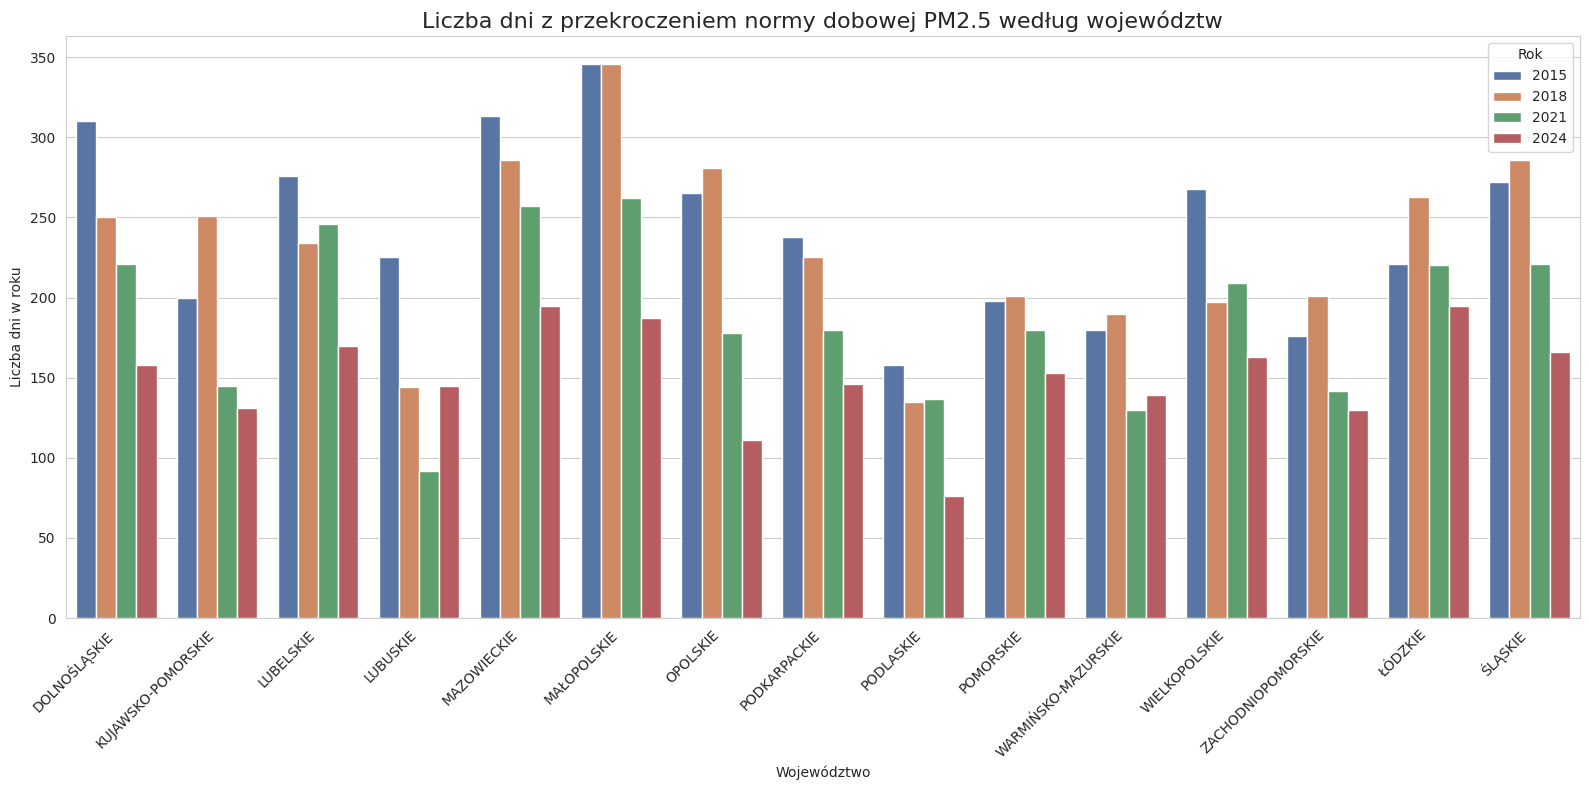

In [112]:
stworz_wykres_slupkowy_static(oblicz_przekroczenia_wojewodztwa(df, df_metadata))

Wniosek: Widać, że w większości województw z roku na rok liczba dni przekraczających stężenie PM2.5 spada. Największe przekroczenia obserwujemy w województwach: małopolskim, mazowieckim, dolnośląskim, śląskim. Najmniejsze zanieczyszczenia obserujwmy w województwie podlaskim, lubuskim, warmińsko-mazurskim, pomorskim, zachodniopomorskim. Można wnioskować, że największe zanieszczyszczenia obserwujemy w województwach, gdzie dominuje architektura miejska i metropolie, natomiast mniejsze zanieczyszczenia obserwujemy w województwach z większą ilością lasów, mórz.